In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0] #Single review.

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# You should also vectorize your labels, which is straightforward
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Validation because we don't want to expose our test data, until knowing that our model will behave properly.

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
#
history = model.fit(partial_x_train, partial_y_train,epochs=10, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 163us/sample - loss: 0.5305 - acc: 0.7875 - val_loss: 0.4076 - val_acc: 0.8702
Epoch 2/10
15000/15000 [==============================] - 1s 85us/sample - loss: 0.3225 - acc: 0.9032 - val_loss: 0.3237 - val_acc: 0.8781
Epoch 3/10
15000/15000 [==============================] - 1s 87us/sample - loss: 0.2351 - acc: 0.9246 - val_loss: 0.2811 - val_acc: 0.8934
Epoch 4/10
15000/15000 [==============================] - 1s 85us/sample - loss: 0.1856 - acc: 0.9391 - val_loss: 0.2773 - val_acc: 0.8883
Epoch 5/10
15000/15000 [==============================] - 1s 84us/sample - loss: 0.1485 - acc: 0.9535 - val_loss: 0.3191 - val_acc: 0.8747
Epoch 6/10
15000/15000 [==============================] - 1s 85us/sample - loss: 0.1242 - acc: 0.9627 - val_loss: 0.2888 - val_acc: 0.8864
Epoch 7/10
15000/1500

In [8]:
history_dict = history.history 
history_dict

{'loss': [0.5304885532220205,
  0.3225056706428528,
  0.23512190188566845,
  0.18559109115997952,
  0.1484595154762268,
  0.12420303327639898,
  0.10480498770872752,
  0.08513182152509689,
  0.07156576076745987,
  0.0600485995610555],
 'acc': [0.78746665,
  0.9032,
  0.9246,
  0.93906665,
  0.95353335,
  0.9626667,
  0.9676667,
  0.97693336,
  0.9809333,
  0.9848667],
 'val_loss': [0.40755179958343507,
  0.3236513400554657,
  0.28106950299739836,
  0.27732420811653136,
  0.3190707922458649,
  0.28883121428489683,
  0.30429794397354126,
  0.32137285480499267,
  0.35324471955299375,
  0.36550308322906494],
 'val_acc': [0.8702,
  0.8781,
  0.8934,
  0.8883,
  0.8747,
  0.8864,
  0.8844,
  0.8835,
  0.8801,
  0.8778]}

In [9]:
history_dict = history.history
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
# Drawing a plot.

In [10]:
# Homework: Examples upto 3.5.8 topic.

In [11]:
print("hello")

hello


In [14]:
# With a smaller model.
def smaller_model():
    model = models.Sequential()
    model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    # Compile.
    model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
    return model

#
history = model.fit(partial_x_train, partial_y_train,epochs=10, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 1s 82us/sample - loss: 0.0073 - acc: 0.9989 - val_loss: 0.7081 - val_acc: 0.8647
Epoch 2/10
15000/15000 [==============================] - 1s 81us/sample - loss: 0.0029 - acc: 0.9999 - val_loss: 0.7447 - val_acc: 0.8602
Epoch 3/10
15000/15000 [==============================] - 1s 82us/sample - loss: 0.0066 - acc: 0.9986 - val_loss: 0.7815 - val_acc: 0.8644
Epoch 4/10
15000/15000 [==============================] - 1s 82us/sample - loss: 0.0017 - acc: 0.9999 - val_loss: 0.8021 - val_acc: 0.8641
Epoch 5/10
15000/15000 [==============================] - 1s 83us/sample - loss: 0.0036 - acc: 0.9992 - val_loss: 0.8399 - val_acc: 0.8610
Epoch 6/10
15000/15000 [==============================] - 1s 84us/sample - loss: 0.0010 - acc: 0.9999 - val_loss: 0.8636 - val_acc: 0.8613
Epoch 7/10
15000/15000 [==============================] - 1s 85us/sample - loss: 8.6944e-04 - acc: 1.0000 - val_loss

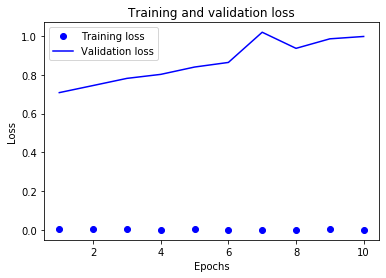

In [15]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

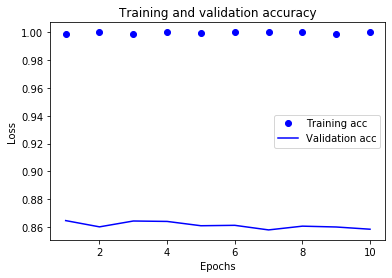

In [17]:
# Training accuracy and Validation accuracy.
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# With higher model capacity.
def larger_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    # Compile.
    model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
    return model

history = model.fit(partial_x_train, partial_y_train,epochs=10, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 1s 89us/sample - loss: 3.0892e-04 - acc: 1.0000 - val_loss: 1.0262 - val_acc: 0.8576
Epoch 2/10
15000/15000 [==============================] - 1s 85us/sample - loss: 4.7627e-04 - acc: 0.9999 - val_loss: 1.0940 - val_acc: 0.8547
Epoch 3/10
15000/15000 [==============================] - 1s 88us/sample - loss: 1.9893e-04 - acc: 1.0000 - val_loss: 1.1101 - val_acc: 0.8586
Epoch 4/10
15000/15000 [==============================] - 1s 85us/sample - loss: 1.4908e-04 - acc: 1.0000 - val_loss: 1.1547 - val_acc: 0.8574
Epoch 5/10
15000/15000 [==============================] - 1s 84us/sample - loss: 0.0013 - acc: 0.9997 - val_loss: 1.2069 - val_acc: 0.8558
Epoch 6/10
15000/15000 [==============================] - 1s 87us/sample - loss: 7.9638e-05 - acc: 1.0000 - val_loss: 1.2195 - val_acc: 0.8554
Epoch 7/10
15000/15000 [==============================] - 1s 94us/sample - loss: 6.7822e-05 - ac

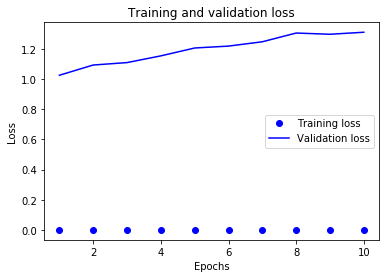

In [19]:
# Training loss and Validation loss.
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

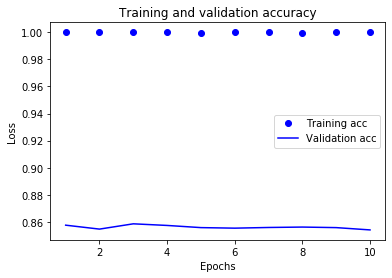

In [20]:
# Training accuracy and Validation accuracy.
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()